In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from kseg_py import *

from imblearn.over_sampling import ADASYN

from scipy.stats import tukey_hsd
from scipy import stats

In [2]:
KNN_rep = pd.read_csv("Resultados/KNN_10V_rep.csv", na_values='?')
KNN_adasyn = pd.read_csv("Resultados/KNN_10V_adasyn.csv", na_values='?')
KNN_contr = pd.read_csv("Resultados/KNN_10V_contr.csv", na_values='?')

Kseg_contr_neg = pd.read_csv("Resultados/Kseg_10V_contr_neg.csv", na_values='?')

RNA_rep = pd.read_csv("Resultados/RNA_10V_rep.csv", na_values='?')
RNA_adasyn = pd.read_csv("Resultados/RNA_10V_adasyn.csv", na_values='?')
RNA_contr = pd.read_csv("Resultados/RNA_10V_contr.csv", na_values='?')

SVM_contr_neg = pd.read_csv("Resultados/SVM_10V_contr_neg.csv", na_values='?')

### **ACCURACY**

In [3]:
RNA_contr.describe()

,sensitivity,specificity,precision,f1score,f2score,gmean_mba,gmean
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.509545,0.495443,0.011897,0.023130,0.053447,0.230027,0.472404
std,0.154015,0.206283,0.004138,0.007807,0.016652,0.079621,0.083252
min,0.181818,0.123837,0.005119,0.010050,0.023810,0.091310,0.302175
25%,0.409091,0.300049,0.009019,0.017602,0.042239,0.172930,0.415841
50%,0.500000,0.527655,0.010872,0.021450,0.050786,0.208617,0.456744
75%,0.602273,0.692854,0.014053,0.027288,0.062986,0.293730,0.541966
max,0.909091,0.829173,0.024715,0.047445,0.105863,0.442531,0.665230


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

axs[0].boxplot([RNA_rep.sensitivity, RNA_adasyn.sensitivity, RNA_contr.sensitivity])
axs[0].set_xticklabels(["Replicação", "ADASYN", "Base"])
axs[0].set_ylabel("Sensibilidade")
axs[0].set_title('RNA')

axs[1].boxplot([KNN_rep.sensitivity, KNN_adasyn.sensitivity, KNN_contr.sensitivity])
axs[1].set_xticklabels(["Replicação", "ADASYN", "Base"])
axs[1].set_title('k-NN')

axs[2].boxplot([SVM_contr_neg.sensitivity])
axs[2].set_xticklabels(['OC-SVM'])
axs[2].set_title('OC-SVM')

axs[3].boxplot([Kseg_contr_neg.sensitivity])
axs[3].set_xticklabels(["OC-PC"])
axs[3].set_title('OC-PC')

plt.show()

### **Sensibilidade**

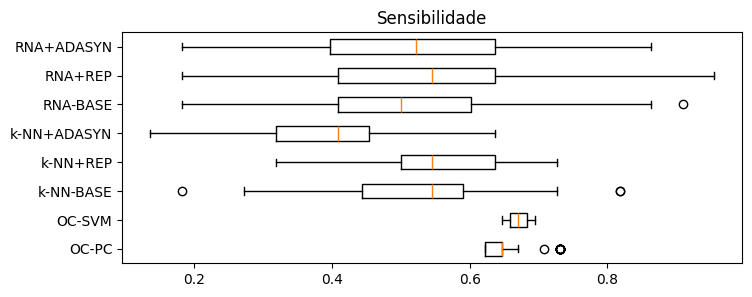

In [4]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.sensitivity, 
            SVM_contr_neg.sensitivity, 
            KNN_contr.sensitivity, 
            KNN_rep.sensitivity, 
            KNN_adasyn.sensitivity, 
            RNA_contr.sensitivity, 
            RNA_rep.sensitivity, 
            RNA_adasyn.sensitivity], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('Sensibilidade')

plt.show()

### **Especificidade**

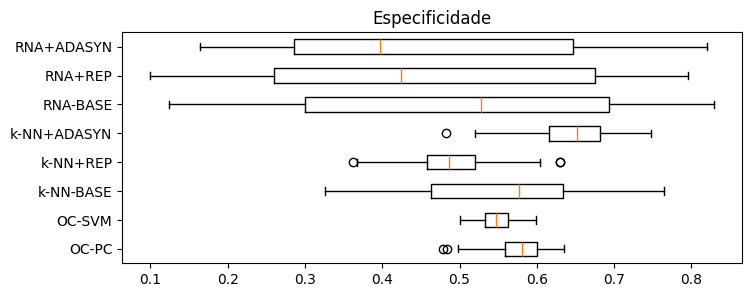

In [5]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.specificity, 
            SVM_contr_neg.specificity, 
            KNN_contr.specificity, 
            KNN_rep.specificity, 
            KNN_adasyn.specificity, 
            RNA_contr.specificity, 
            RNA_rep.specificity, 
            RNA_adasyn.specificity], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('Especificidade')

plt.show()

### **Precisão**

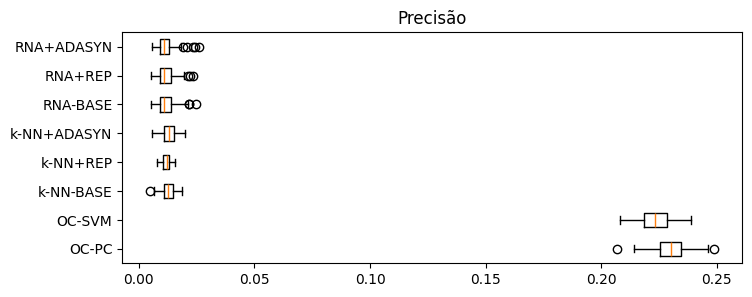

In [6]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.precision, 
            SVM_contr_neg.precision, 
            KNN_contr.precision, 
            KNN_rep.precision, 
            KNN_adasyn.precision, 
            RNA_contr.precision, 
            RNA_rep.precision, 
            RNA_adasyn.precision], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('Precisão')

plt.show()

### **F-measure**

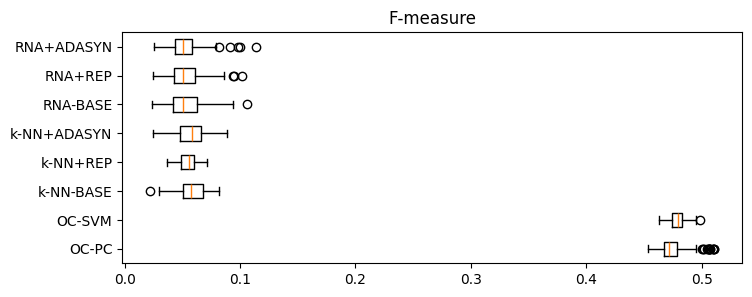

In [7]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.f2score, 
            SVM_contr_neg.f2score, 
            KNN_contr.f2score, 
            KNN_rep.f2score, 
            KNN_adasyn.f2score, 
            RNA_contr.f2score, 
            RNA_rep.f2score, 
            RNA_adasyn.f2score], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('F-measure')

plt.show()

### **G-mean**

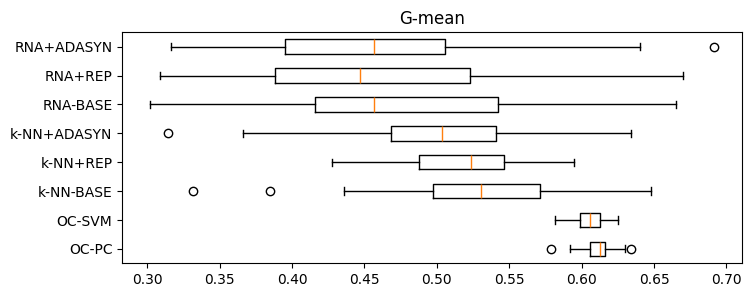

In [8]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.gmean, 
            SVM_contr_neg.gmean, 
            KNN_contr.gmean, 
            KNN_rep.gmean, 
            KNN_adasyn.gmean, 
            RNA_contr.gmean, 
            RNA_rep.gmean, 
            RNA_adasyn.gmean], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('G-mean')

plt.show()

### **IBA**

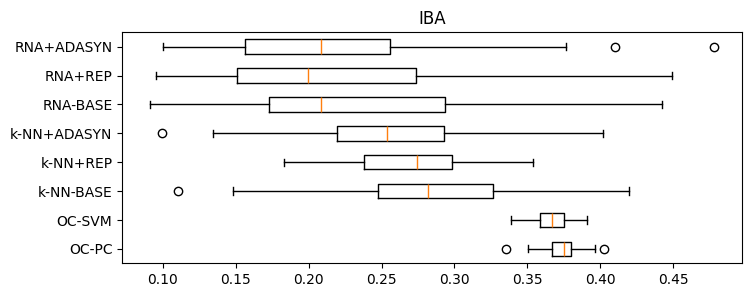

In [9]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.gmean_mba, 
            SVM_contr_neg.gmean_mba, 
            KNN_contr.gmean_mba, 
            KNN_rep.gmean_mba, 
            KNN_adasyn.gmean_mba, 
            RNA_contr.gmean_mba, 
            RNA_rep.gmean_mba, 
            RNA_adasyn.gmean_mba], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('IBA')

plt.show()